<a href="https://colab.research.google.com/github/Harivamsh2005/AIML-lab/blob/main/AIML_A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
       credit.policy     int.rate  installment  log.annual.inc 

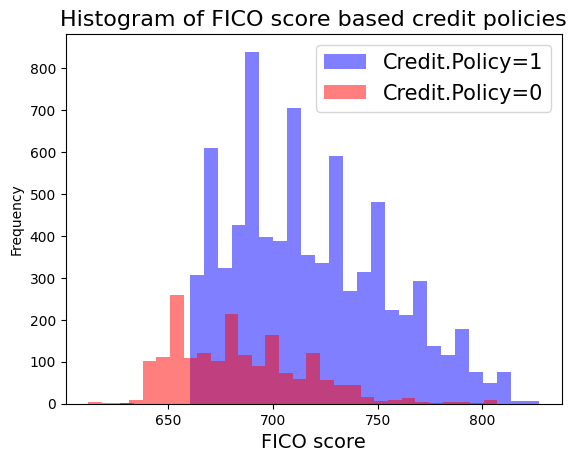

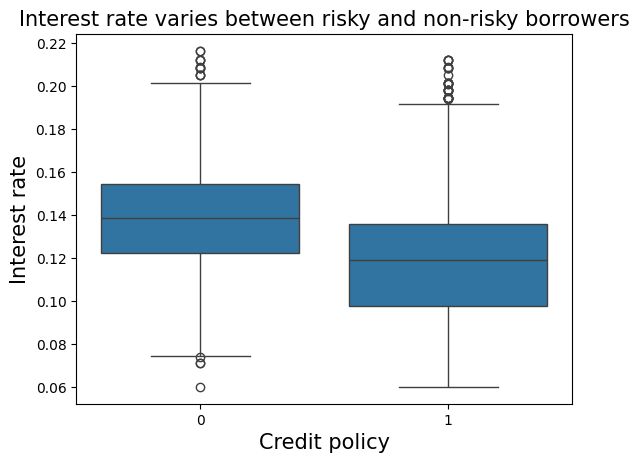

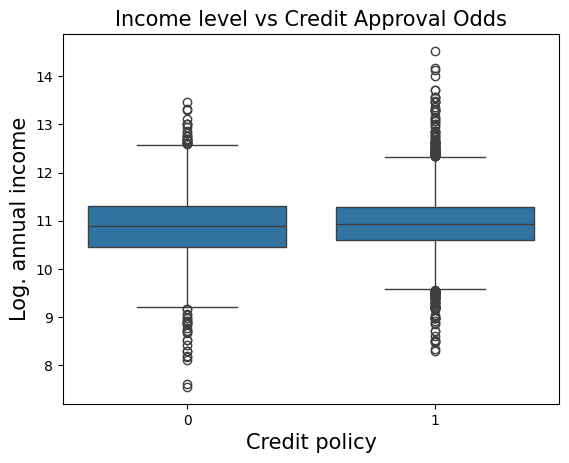

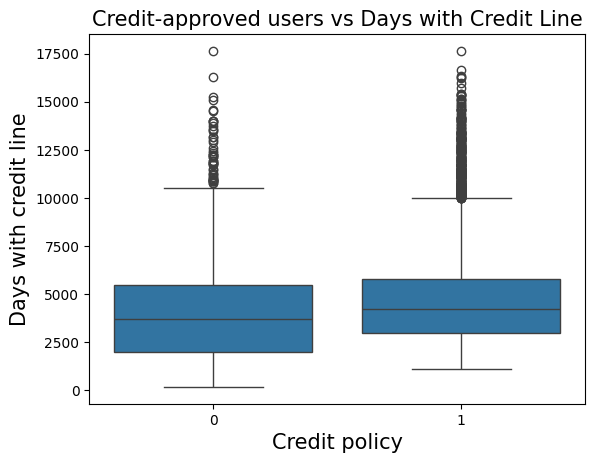

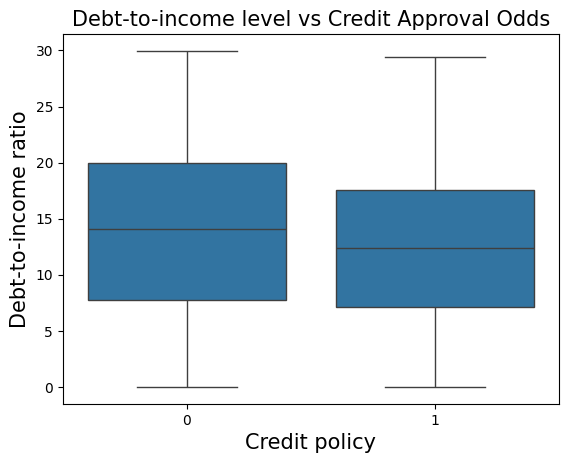

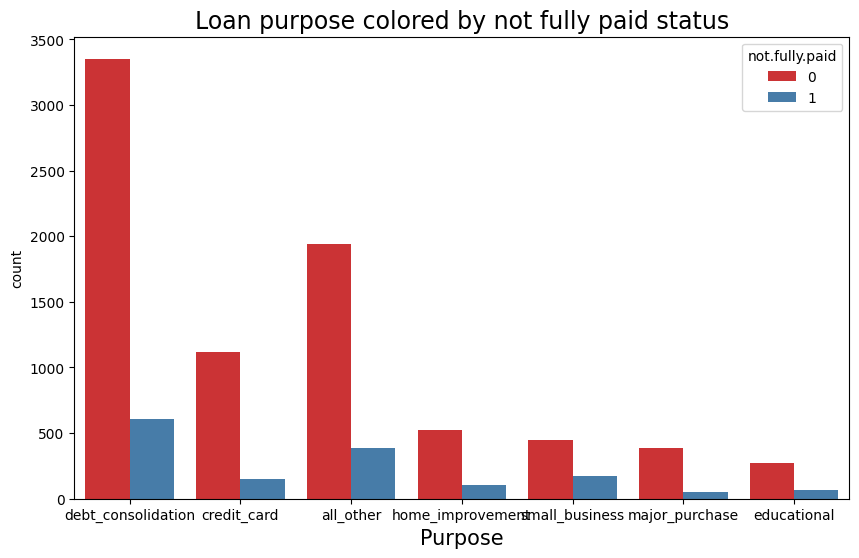

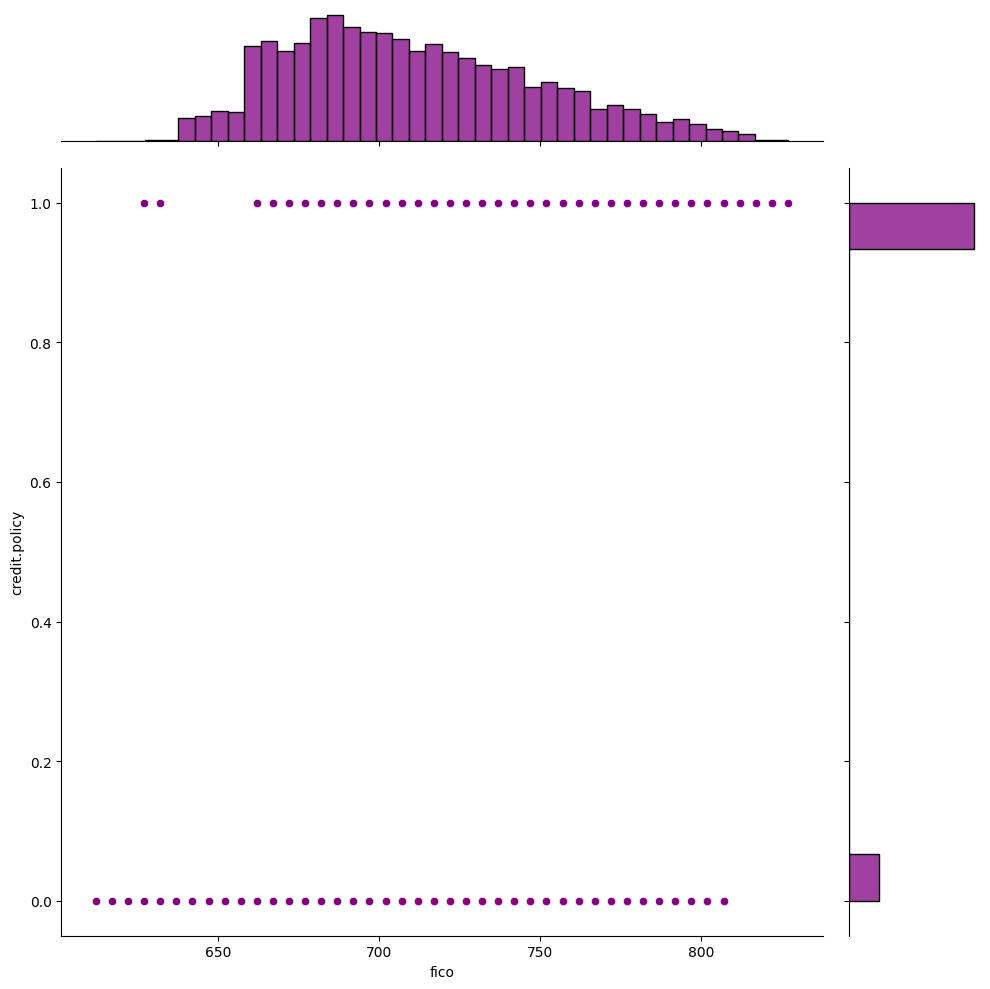

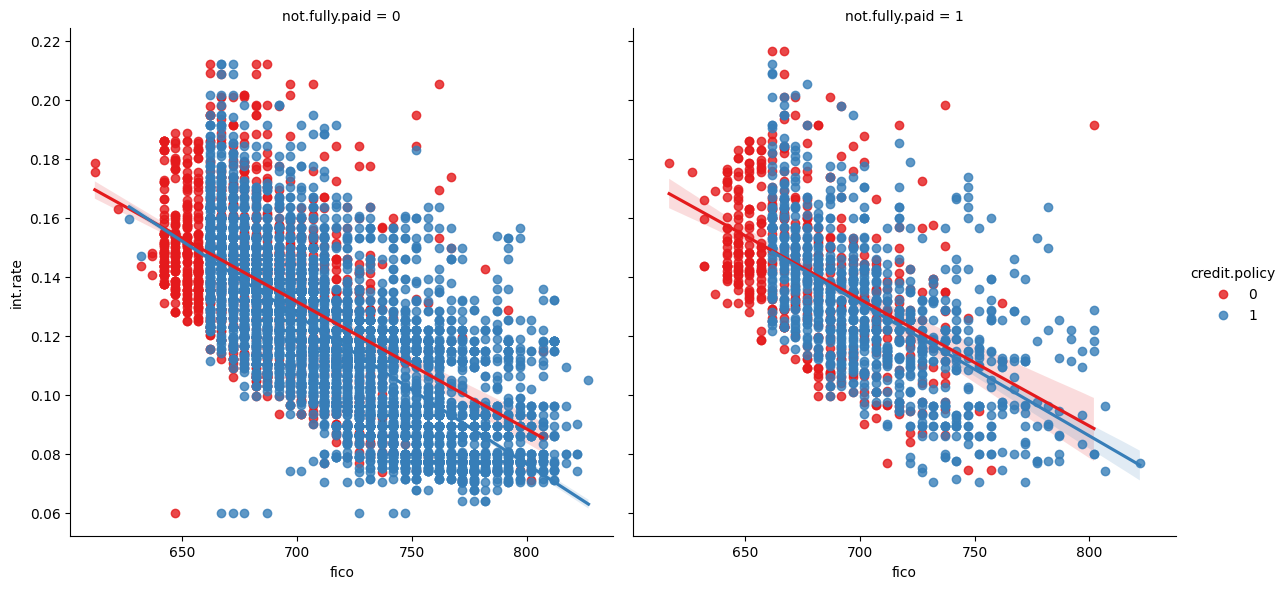

Decision Tree - Training Accuracy: 1.0
Decision Tree - Testing Accuracy: 0.7348643006263048
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1623
           1       0.20      0.24      0.22       293

    accuracy                           0.73      1916
   macro avg       0.53      0.53      0.53      1916
weighted avg       0.76      0.73      0.74      1916

Confusion Matrix:
 [[1338  285]
 [ 223   70]]
Random Forest - Training Accuracy: 1.0
Random Forest - Testing Accuracy: 0.8470772442588727
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.50      0.02      0.03       293

    accuracy                           0.85      1916
   macro avg       0.67      0.51      0.47      1916
weighted avg       0.80      0.85      0.78      1916

Confusion Matrix:
 [[1618    5]
 [ 288    5]]


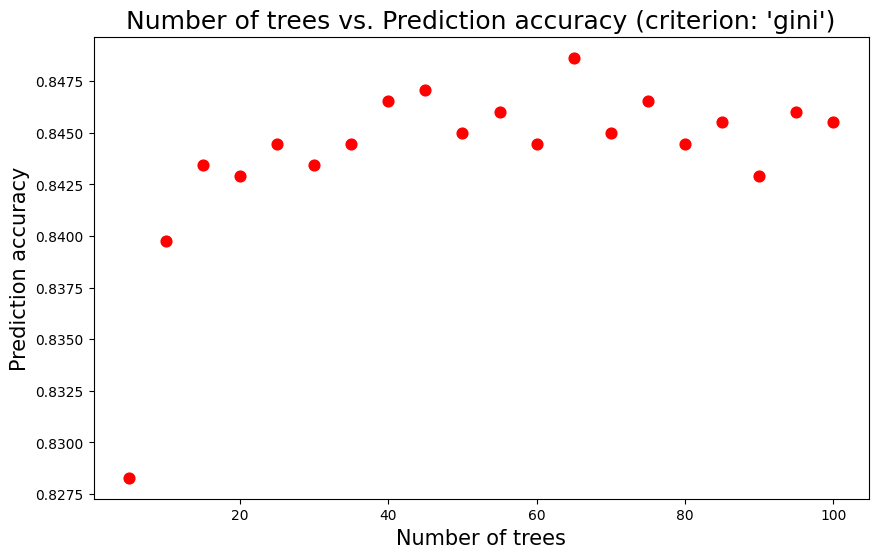

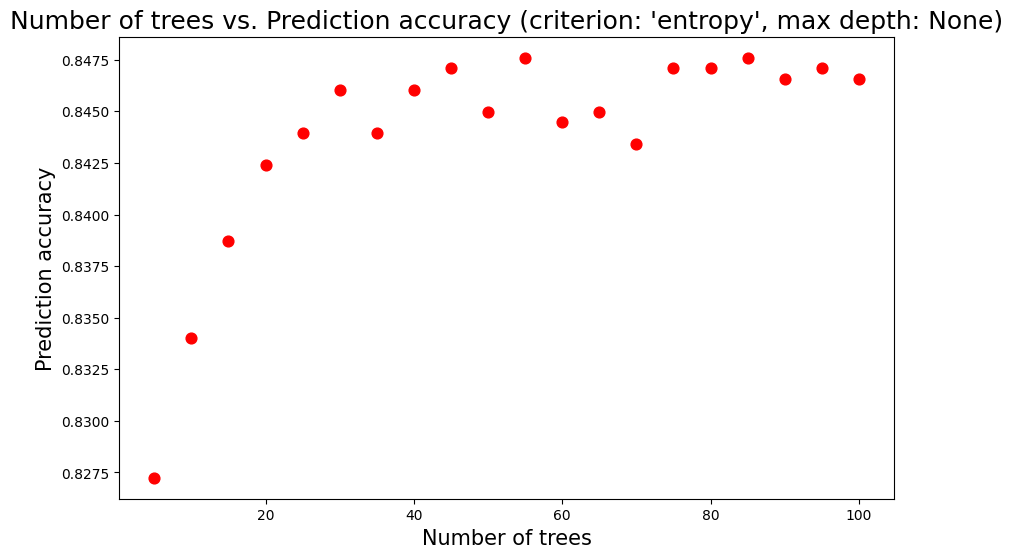

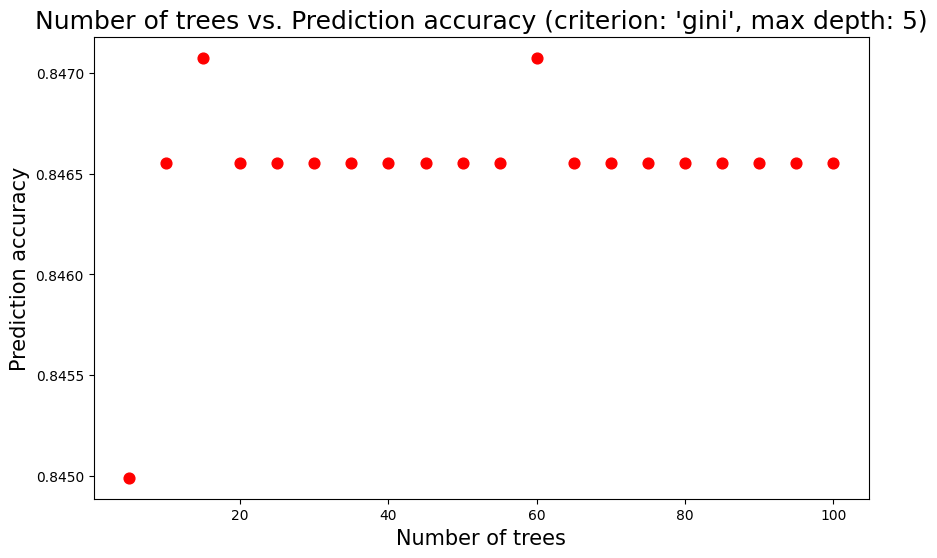

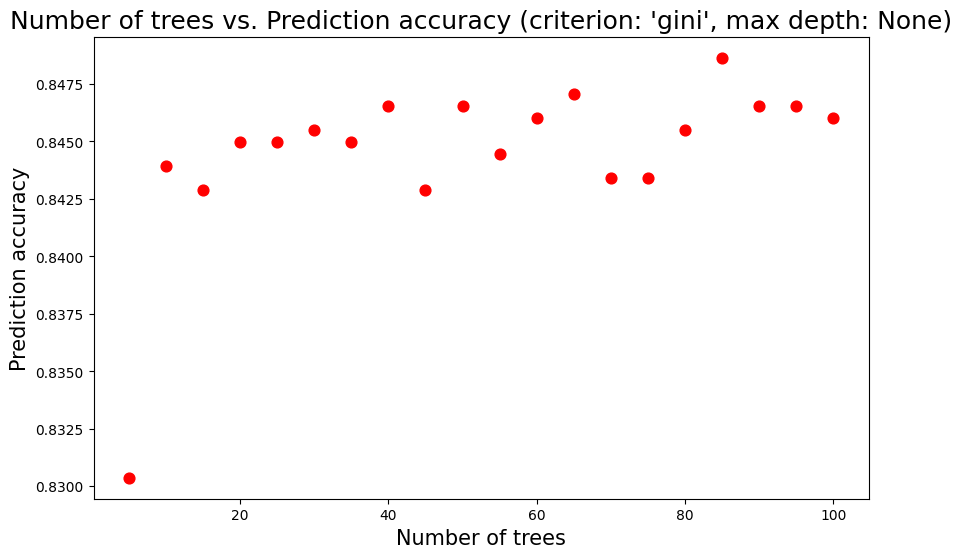

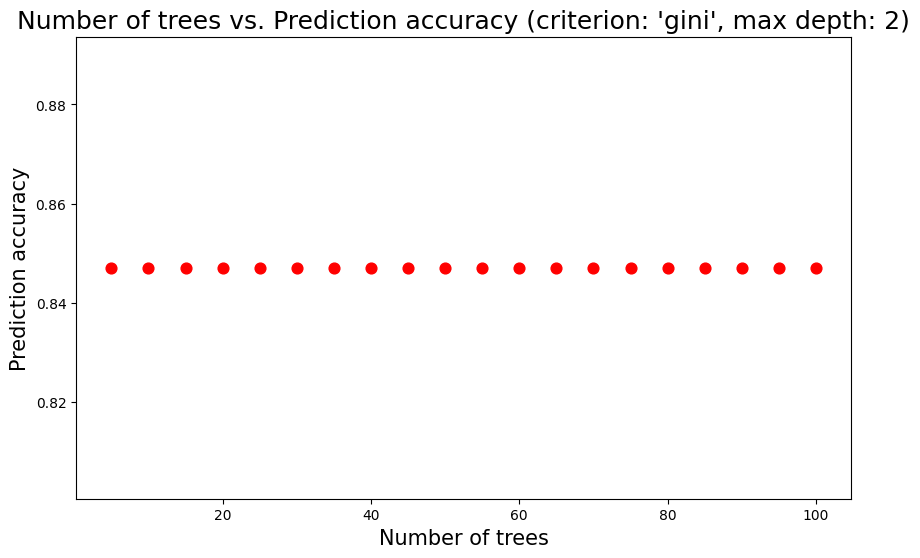

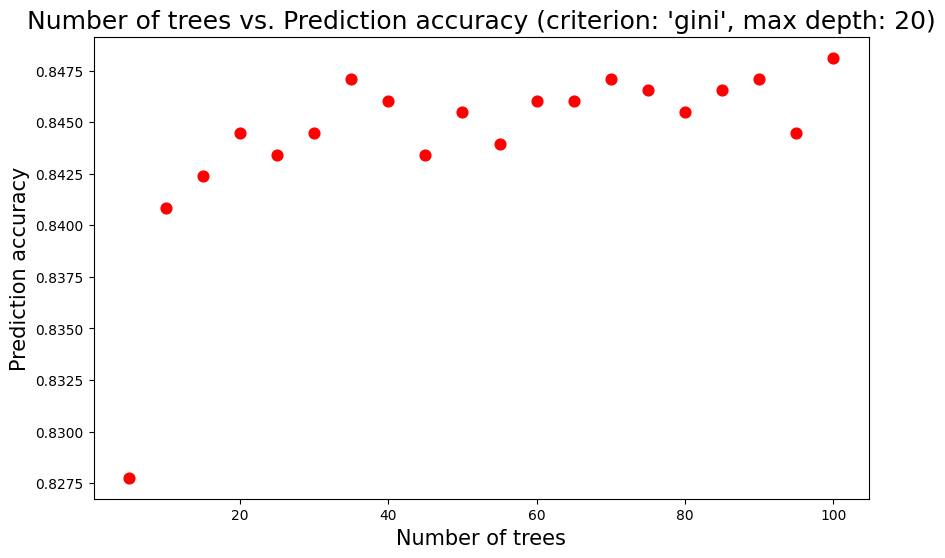

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

%matplotlib inline

# Load the data
df = pd.read_csv('loan_data.csv')

# Basic data exploration
df.info()
print(df.describe())
print(df.head())

print("Breakup of credit approval status.\n1 means approved credit, 0 means not approved.")
print(df['credit.policy'].value_counts())

print(f"Top 5 criteria for Loan Approval:\n{df['purpose'].value_counts()}")
print(f"Top 5 Int.Rates for Loan Approval:\n{df['int.rate'].value_counts()}")

# Histogram of FICO score based on credit policy
df[df['credit.policy'] == 1]['fico'].plot.hist(bins=30, alpha=0.5, color='blue', label='Credit.Policy=1')
df[df['credit.policy'] == 0]['fico'].plot.hist(bins=30, alpha=0.5, color='red', label='Credit.Policy=0')
plt.legend(fontsize=15)
plt.title("Histogram of FICO score based credit policies", fontsize=16)
plt.xlabel("FICO score", fontsize=14)
plt.show()

# Box plots for various relationships
sns.boxplot(x=df['credit.policy'], y=df['int.rate'])
plt.title("Interest rate varies between risky and non-risky borrowers", fontsize=15)
plt.xlabel("Credit policy", fontsize=15)
plt.ylabel("Interest rate", fontsize=15)
plt.show()

sns.boxplot(x=df['credit.policy'], y=df['log.annual.inc'])
plt.title("Income level vs Credit Approval Odds", fontsize=15)
plt.xlabel("Credit policy", fontsize=15)
plt.ylabel("Log. annual income", fontsize=15)
plt.show()

sns.boxplot(x=df['credit.policy'], y=df['days.with.cr.line'])
plt.title("Credit-approved users vs Days with Credit Line", fontsize=15)
plt.xlabel("Credit policy", fontsize=15)
plt.ylabel("Days with credit line", fontsize=15)
plt.show()

sns.boxplot(x=df['credit.policy'], y=df['dti'])
plt.title("Debt-to-income level vs Credit Approval Odds", fontsize=15)
plt.xlabel("Credit policy", fontsize=15)
plt.ylabel("Debt-to-income ratio", fontsize=15)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='purpose', hue='not.fully.paid', data=df, palette='Set1')
plt.title("Loan purpose colored by not fully paid status", fontsize=17)
plt.xlabel("Purpose", fontsize=15)
plt.show()

sns.jointplot(x='fico', y='credit.policy', data=df, color='purple', height=10)
plt.show()

sns.lmplot(y='int.rate', x='fico', data=df, hue='credit.policy', col='not.fully.paid', palette='Set1', height=6)
plt.show()

# One-hot encoding for categorical variables
df_final = pd.get_dummies(df, columns=['purpose'], drop_first=True)

# Splitting the data into training and test sets
X = df_final.drop('not.fully.paid', axis=1)
y = df_final['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

# Decision Tree Model
dtree = DecisionTreeClassifier(criterion='gini', max_depth=None)
dtree.fit(X_train, y_train)

train_pred = dtree.predict(X_train)
test_pred = dtree.predict(X_test)

print(f"Decision Tree - Training Accuracy: {accuracy_score(y_train, train_pred)}")
print(f"Decision Tree - Testing Accuracy: {accuracy_score(y_test, test_pred)}")
print(classification_report(y_test, test_pred))
cm = confusion_matrix(y_test, test_pred)
print("Confusion Matrix:\n", cm)

# Random Forest Model
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)
rfc_train_pred = rfc.predict(X_train)
rfc_test_pred = rfc.predict(X_test)

print(f"Random Forest - Training Accuracy: {accuracy_score(y_train, rfc_train_pred)}")
print(f"Random Forest - Testing Accuracy: {accuracy_score(y_test, rfc_test_pred)}")
print(classification_report(y_test, rfc_test_pred))
cm = confusion_matrix(y_test, rfc_test_pred)
print("Confusion Matrix:\n", cm)

# Random Forest - Experimenting with different parameters
nsimu = 21
accuracy = [0] * nsimu
ntree = [0] * nsimu

for i in range(1, nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5, min_samples_split=10, max_depth=None, criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test, rfc_pred)
    accuracy[i] = (cm[0, 0] + cm[1, 1]) / cm.sum()
    ntree[i] = i * 5

plt.figure(figsize=(10, 6))
plt.scatter(x=ntree[1:nsimu], y=accuracy[1:nsimu], s=60, c='red')
plt.title("Number of trees vs. Prediction accuracy (criterion: 'gini')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy", fontsize=15)
plt.show()

# Repeat experiment with other parameters (criterion: 'entropy', max depth variations)
for criterion, max_depth in [('entropy', None), ('gini', 5), ('gini', None), ('gini', 2), ('gini', 20)]:
    accuracy = [0] * nsimu
    ntree = [0] * nsimu
    for i in range(1, nsimu):
        rfc = RandomForestClassifier(n_estimators=i*5, min_samples_split=10, max_depth=max_depth, criterion=criterion)
        rfc.fit(X_train, y_train)
        rfc_pred = rfc.predict(X_test)
        cm = confusion_matrix(y_test, rfc_pred)
        accuracy[i] = (cm[0, 0] + cm[1, 1]) / cm.sum()
        ntree[i] = i * 5

    plt.figure(figsize=(10, 6))
    plt.scatter(x=ntree[1:nsimu], y=accuracy[1:nsimu], s=60, c='red')
    title = f"Number of trees vs. Prediction accuracy (criterion: '{criterion}', max depth: {max_depth})"
    plt.title(title, fontsize=18)
    plt.xlabel("Number of trees", fontsize=15)
    plt.ylabel("Prediction accuracy", fontsize=15)
    plt.show()